# Lesson 4 Assignment - Automobile Price Hypothesis Testing
## Author - Shuyang Ren

### Instructions
Test hypotheses for the price of automobiles:

1. Compare and test the normality of the distributions of **price** and **log price**. <br/>
Use both a graphical method and a formal test. Hint: remember these relationships will always be approximate.

2. Test significance of **price (or log price)** stratified by 
a) **fuel type**, b) **aspiration**, and c) **rear vs. front wheel drive**. <br />Use both graphical methods and the formal test.

3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **price (or log price** if closer to a normal distribution) of autos stratified by **body style**.

4. Graphically explore the differences between the price conditioned by the categories of each variable. <br/>
Hint: Make sure you have enough data for each category and drop categories with insufficient data.

5. Use standard ANOVA and Tukey HSD to test the differences of these groups.


#### Note: 
Please clearly outline the results of these tests with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [3]:
# Read in file
auto = pd.read_csv(fileName)
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Checkingfor data types
auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
# data prep
# remove rows with '?' (aka missing)
for column in auto:
    if not is_numeric_dtype(auto[column]):
        auto.loc[auto[column] == '?', column] = np.nan
        auto.dropna(axis = 0, inplace = True)
# convert price, horsepower, and peak rpm to numeric
for column in ['price', 'horsepower', 'peak-rpm']:
    auto[column] = pd.to_numeric(auto[column])
# add 'log price' to the df for analysis
auto['log-price'] = np.log(auto.price)

C:\Users\shuya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


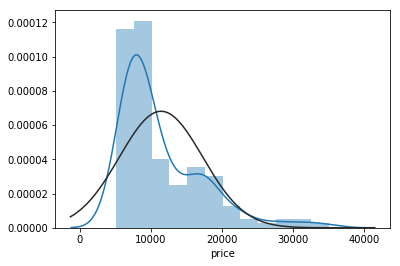

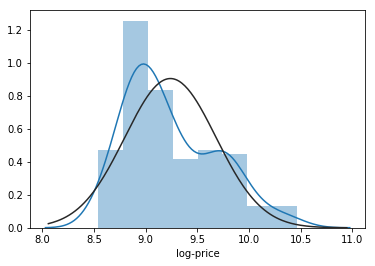

In [6]:
# normality of price by comparing and test the normality of distribution of price and log price
sns.distplot(auto['price'], fit=stats.norm)
plt.show()
sns.distplot(auto['log-price'], fit=stats.norm)
plt.show()

In [7]:
# from the above results, we see they both are skewed to the right and that price is more skewed than log price.
stats.normaltest(auto['price'])

NormaltestResult(statistic=53.77206230415133, pvalue=2.1064202945306713e-12)

In [8]:
stats.normaltest(auto['log-price'])

NormaltestResult(statistic=11.959170318658108, pvalue=0.002529875569851499)

(0.0, 50000.0)

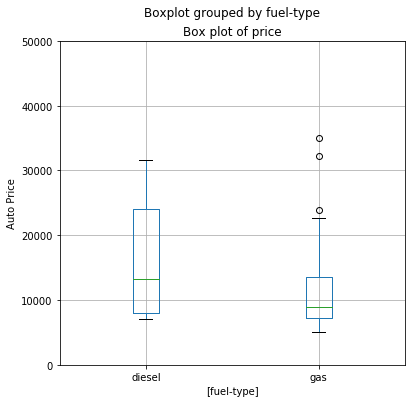

In [9]:
# the significance of stratified price by fuel type, aspiration, and rear vs frontal wheel drive
# plot area
fig = plt.figure(figsize=(6, 6))
# axis
ax = fig.gca()
auto.loc[:,['price', 'fuel-type']].boxplot(by = 'fuel-type', ax = ax)
# main title 
ax.set_title('Box plot of price')
# y axis title
ax.set_ylabel('Auto Price')
# x axis limits
ax.set_ylim(0.0, 50000.0)

(0.0, 50000.0)

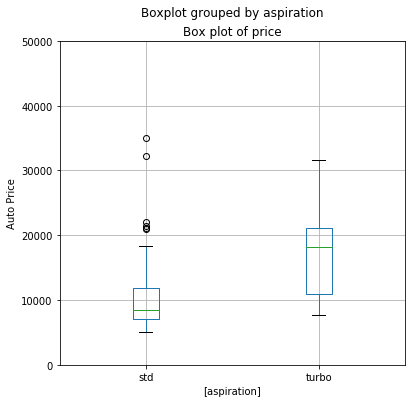

In [10]:
# plot area
fig = plt.figure(figsize=(6, 6))
# axis
ax = fig.gca()
auto.loc[:,['price', 'aspiration']].boxplot(by = 'aspiration', ax = ax)
# main title 
ax.set_title('Box plot of price')
# y axis title
ax.set_ylabel('Auto Price')
# x axis limits
ax.set_ylim(0.0, 50000.0)

(0.0, 50000.0)

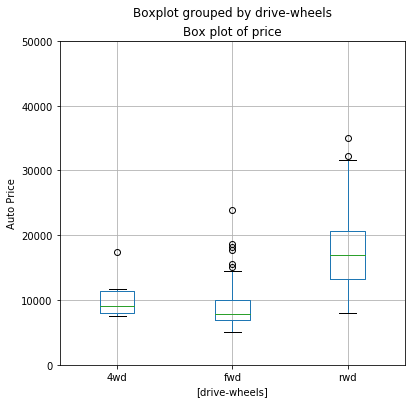

In [11]:
# plot area
fig = plt.figure(figsize=(6, 6))
# axis
ax = fig.gca()
auto.loc[:,['price', 'drive-wheels']].boxplot(by = 'drive-wheels', ax = ax)
# main title 
ax.set_title('Box plot of price')
# y axis title
ax.set_ylabel('Auto Price')
# x axis limits
ax.set_ylim(0.0, 50000.0)

In [12]:
# stratify method from L04-1
def stratify(group, dat, p=0.01):
    # make groups
    groups = dat.groupby(group)
    # size of smallest group
    nums = min(groups.size())
    # number of samples per group
    num = int(p * dat.shape[0])
    # sample each group with large enough of a size
    if num <= nums:
        return groups.apply(lambda x: x.sample(n=num))
    else:
        pmax = nums / dat.shape[0]
        print('The maximum value of p = ' + str(pmax))

# count mean method from L04-1
def count_mean(group, dat):
    # make groups
    groups = dat.groupby(group)
    # make a data frame  object with the counts and the means of the groups
    return pd.DataFrame({'count': groups.size(), 'mean': groups.aggregate(np.mean).loc[:, 'price']})

In [13]:
# make stratified groups
fuel_strat = stratify('fuel-type', auto)
print(count_mean('fuel-type', fuel_strat))
aspiration_strat = stratify('aspiration', auto)
print(count_mean('aspiration', aspiration_strat))
drive_strat = stratify('drive-wheels', auto)
print(count_mean('drive-wheels', drive_strat))

           count   mean
fuel-type              
diesel         1  25552
gas            1  21485
            count   mean
aspiration              
std             1   8449
turbo           1  22625
              count   mean
drive-wheels              
4wd               1   7898
fwd               1  12170
rwd               1  18399


C:\Users\shuya\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 'fuel-type' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
C:\Users\shuya\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 'aspiration' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
C:\Users\shuya\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 'drive-wheels' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


In [14]:
# The tests above and the graphs show that similar results on the column's correlation with price:
# Cars with diesel's are slightly more expensive than cars with gas
# Cars with turbos are more exmpensive than standard
# Cars with rear-wheel drive are more expensive than cars with 4wd, which is then more expensive than cars with front wheel drive.\n",

In [15]:
# ANOVA and Turkey HSD to auto data and compare price of the autos stratified by body style
auto['body-style'].value_counts()

sedan          79
hatchback      56
wagon          17
hardtop         5
convertible     2
Name: body-style, dtype: int64

In [16]:
f_statistic, p_value = stats.f_oneway(auto.loc[auto.loc[:, 'body-style'] == 'sedan', 'price'], 
                      auto.loc[auto.loc[:, 'body-style'] == 'hatchback', 'price'], 
                      auto.loc[auto.loc[:, 'body-style'] == 'wagon', 'price'], 
                      auto.loc[auto.loc[:, 'body-style'] == 'hardtop', 'price'], 
                      auto.loc[auto.loc[:, 'body-style'] == 'convertible', 'price'])
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 6.950543250527861
P-value = 3.6002841094832276e-05


(0.0, 50000.0)

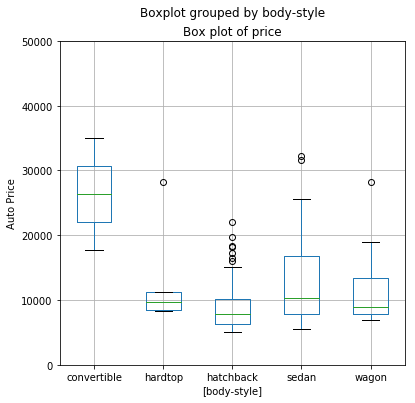

In [17]:
# box of auto prices to explore the cateogries
# plot area
fig = plt.figure(figsize=(6, 6))
# axis
ax = fig.gca()
auto.loc[:,['price', 'body-style']].boxplot(by = 'body-style', ax = ax)
# title
ax.set_title('Box plot of price')
# y-axis title
ax.set_ylabel('Auto Price')
# y-axis limits
ax.set_ylim(0.0, 50000.0)

In [18]:
# standard ANOVA and Tukey HSD to test the differences of the following groups
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df = pd.DataFrame({'vals': auto.loc[auto.loc[:, 'body-style'] == 'sedan', 'price'] +
                           auto.loc[auto.loc[:, 'body-style'] == 'hatchback', 'price'] + 
                           auto.loc[auto.loc[:, 'body-style'] == 'wagon', 'price'] + 
                           auto.loc[auto.loc[:, 'body-style'] == 'hardtop', 'price'] +
                           auto.loc[auto.loc[:, 'body-style'] == 'convertible', 'price'],
                   'group_num': ['1'] * 50 + ['2'] * 50 + ['3'] * 60 + ['4'] * 40 + ['5']})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

ValueError: array length 201 does not match index length 159

In [19]:
# I am not sure how to handle the error above